In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [2]:
wine_data = pd.read_csv("winequality_white.csv")

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data.shape

(4898, 12)

In [5]:
(wine_data.isna().sum()/len(wine_data))*100

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.326664
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.673744
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

#### to remove null values

In [6]:
new_wine_data=wine_data.dropna(axis=0)

In [7]:
(new_wine_data.isna().sum()/len(wine_data))*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [8]:
new_wine_data.shape

(4849, 12)

In [9]:
X =new_wine_data.drop(["quality"], axis=1) # quality is output
y = new_wine_data["quality"]
print(X.head())
y.head()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  


0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((3879, 11), (970, 11))

In [12]:
y_train.shape, y_test.shape

((3879,), (970,))

In [13]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [15]:
def poly_regression(n):
    
    poly_features = PolynomialFeatures(degree=n)

    X_train_poly = poly_features.fit_transform(X_train_std)
    X_test_poly = poly_features.fit_transform(X_test_std)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    cross_val_r2score_poly = cross_val_score(poly_reg, X_train_poly, y_train, 
                               cv=10, scoring="r2")
    print("CV R2 score: ", cross_val_r2score_poly.mean())
    
    y_test_pred_poly = poly_reg.predict(X_test_poly)
    print("test R2 Score: ", r2_score(y_test, y_test_pred_poly))

In [16]:
poly_regression(1)

CV R2 score:  0.27173746700616547
test R2 Score:  0.27241223850576946


In [17]:
poly_regression(2)

CV R2 score:  0.2993973661945863
test R2 Score:  0.3238687691974952


In [18]:
def plot_learning_curves(model, n):
    
    poly_features = PolynomialFeatures(degree=n)

    X_train_poly = poly_features.fit_transform(X_train_std)
    X_test_poly = poly_features.fit_transform(X_test_std)
    
    train_errors, test_errors = [], []

    for m in range(1, len(X_train_std)):
        model.fit(X_train_poly[:m], y_train[:m])
        
        y_train_pred = model.predict(X_train_poly[:m])
        y_test_pred = model.predict(X_test_poly)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    

    plt.figure(figsize=(10,6))
   # plt.axis([1, 400, 40000, 140000])
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label="test")
    
    plt.legend(loc="best", fontsize=14)   
    
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

(1.0, 4000.0, -1.0, 2.0)

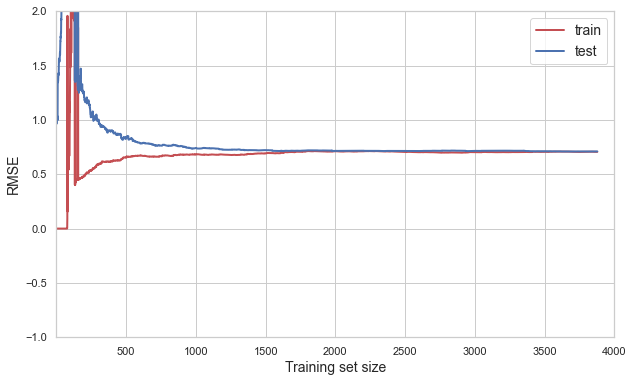

In [19]:
poly_reg=LinearRegression()
plot_learning_curves(poly_reg, 2)
plt.axis([1, 4000, -1, 2])  #first run without this , using this we are jst zooming that output
#underfitting curve as both lnes joining 

In [20]:
from sklearn.tree import DecisionTreeRegressor

dic_reg = DecisionTreeRegressor()

dic_reg.fit(X_train_std, y_train)

DecisionTreeRegressor()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics



cross_val_r2score = cross_val_score(dic_reg, X_train_std, y_train, 
                               cv=10, scoring="r2")

cross_val_r2score.mean()

0.047555711144072164

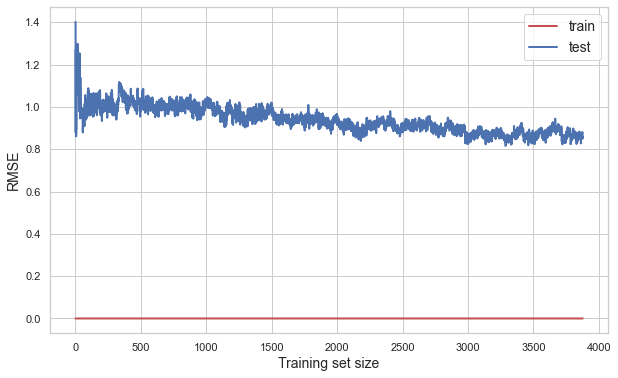

In [22]:
plot_learning_curves(dic_reg, 1)    #from function above
#overfitting graph as error is zero 

In [23]:
# poly reg underfitting and decision tree overfitting 